In [65]:
import pandas as pd

In [66]:
df_1 = pd.read_csv('C:\\Users\\asada\\Desktop\\ml_projects\\not_completed\\water\\water_potability.csv')

In [67]:
df_1

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [68]:
df_1.isna().any()

ph                  True
Hardness           False
Solids             False
Chloramines        False
Sulfate             True
Conductivity       False
Organic_carbon     False
Trihalomethanes     True
Turbidity          False
Potability         False
dtype: bool

In [69]:
df_1.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

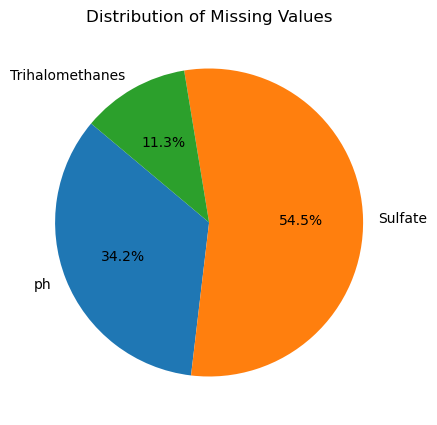

In [71]:
import matplotlib.pyplot as plt

missing_values = df_1.isnull().sum()
missing_values = missing_values[missing_values > 0]
plt.figure(figsize=(5, 5))
plt.pie(missing_values, labels=missing_values.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Missing Values')
plt.show()

In [8]:
df_1['Sulfate'] = df_1['Sulfate'].fillna(df_1['Sulfate'].mean())

In [9]:
df_1.isna().sum()


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate              0
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [10]:
df_1['ph'] = df_1['ph'].fillna(df_1['ph'].mean())

In [11]:
df_1.isna().sum()

ph                   0
Hardness             0
Solids               0
Chloramines          0
Sulfate              0
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [12]:
df_1['Trihalomethanes'] = df_1['Trihalomethanes'].fillna(df_1['Trihalomethanes'].mean())

In [13]:
df_1.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

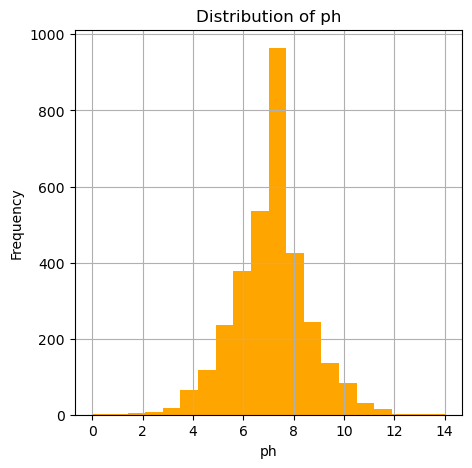

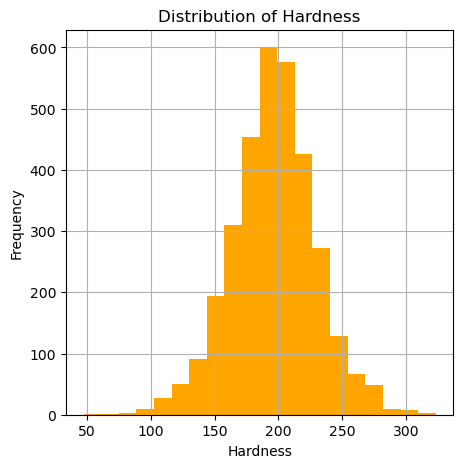

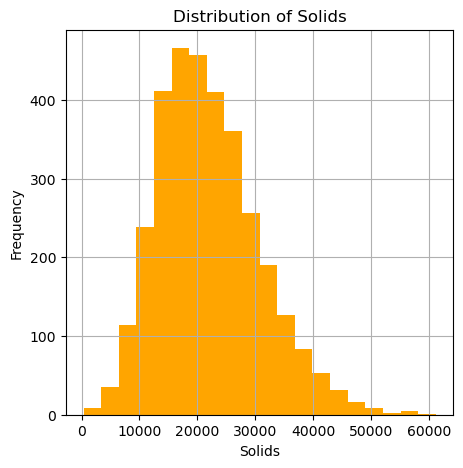

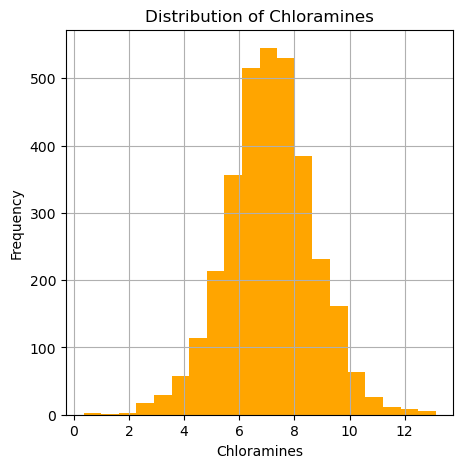

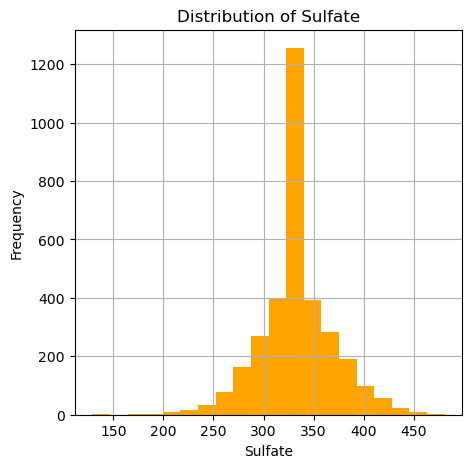

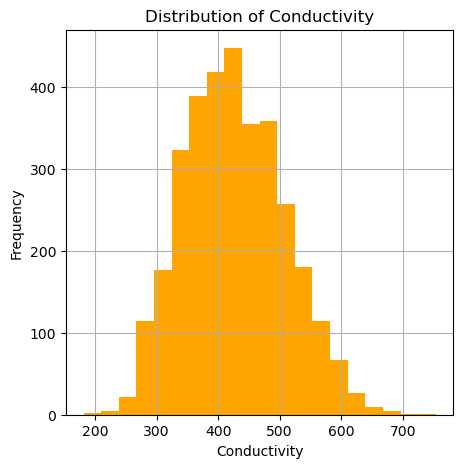

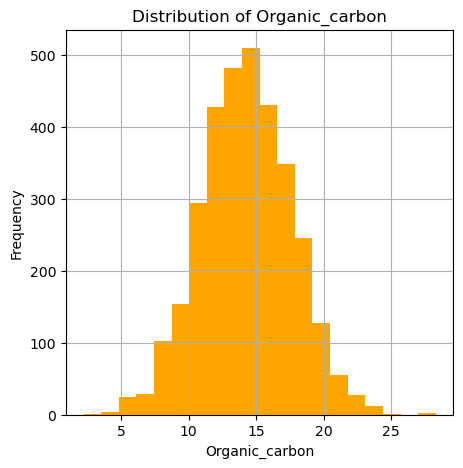

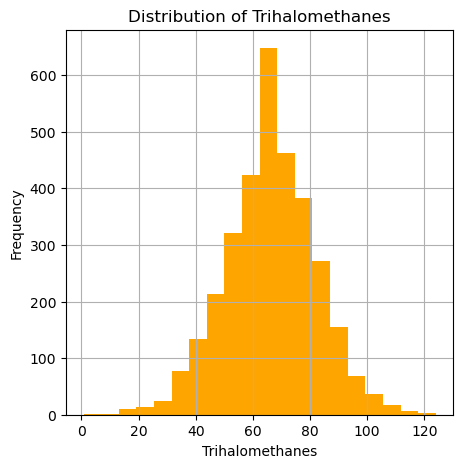

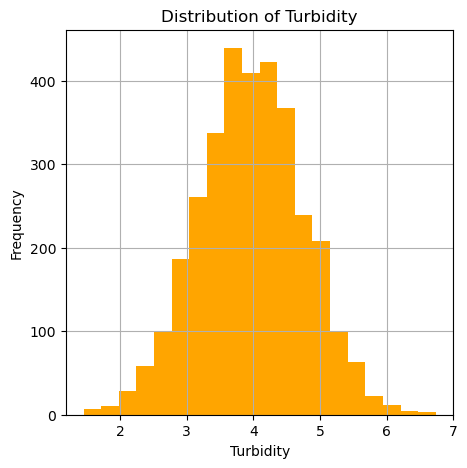

In [54]:
for column in df_1.columns:
    if df_1[column].dtype == 'float64':
        plt.figure(figsize=(5, 5))
        plt.hist(df_1[column], bins=20, color='orange')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

[]

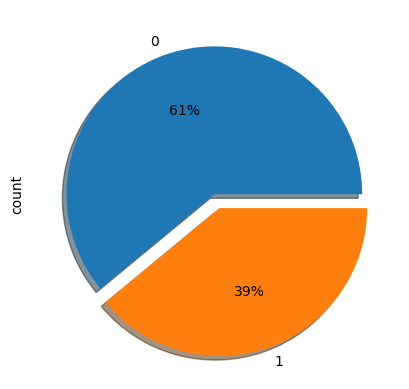

In [55]:
df_1['Potability'].value_counts().plot.pie(explode=(0,0.1),autopct="%.0f%%",shadow=True)
plt.plot()

In [15]:
df_1.sample()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1015,7.080795,206.577843,40710.524386,8.813666,320.449328,468.051715,14.5235,71.450447,5.486132,0


In [16]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_1)

In [27]:
df_scaled = pd.DataFrame(df_scaled, columns = df_1.columns)

In [30]:
df_scaled.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.505771,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091,0.0
1,0.265434,0.297400,0.300611,0.491839,0.581699,0.719411,0.497319,0.450999,0.576793,0.0
2,0.578509,0.641311,0.321619,0.698543,0.581699,0.414652,0.562017,0.532866,0.303637,0.0
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015,0.0
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327,0.0


In [42]:
X = df_scaled.drop('Potability', axis = 'columns')
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.505771,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091
1,0.265434,0.297400,0.300611,0.491839,0.581699,0.719411,0.497319,0.450999,0.576793
2,0.578509,0.641311,0.321619,0.698543,0.581699,0.414652,0.562017,0.532866,0.303637
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327
...,...,...,...,...,...,...,...,...,...
3271,0.333436,0.530482,0.775947,0.533436,0.656047,0.603192,0.448062,0.535037,0.564534
3272,0.557775,0.530016,0.279263,0.603473,0.581699,0.368912,0.678284,0.532673,0.254915
3273,0.672822,0.465486,0.539101,0.547807,0.581699,0.438152,0.338662,0.560655,0.349570
3274,0.366197,0.664407,0.191490,0.465860,0.581699,0.387157,0.343638,0.622659,0.616120


In [34]:
y = df_scaled['Potability']

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB


In [49]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),  
    'Random Forest Classifier': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Lasso': Lasso(max_iter=10000),  
    'Multinomial Naive Bayes': MultinomialNB(),
    'Gaussian Naive Bayes': GaussianNB()
}
params = {
    'Logistic Regression': [{'penalty': ['l2'], 'C': [0.1]}],  
    'Random Forest Classifier': [{'max_depth': [None], 'n_estimators': [100]}],  
    'Support Vector Machine': [{'C': [10], 'gamma': ['scale']}],  
    'Lasso': [{'alpha': [0.1]}],  
    'Multinomial Naive Bayes': [{'alpha': [0.1]}],  
    'Gaussian Naive Bayes': [{}]
}
grid_search_params = {'cv': 5, 'verbose': 1}

In [50]:
for name, model in models.items():
    param_grid = params[name]
    grid_search = GridSearchCV(model, param_grid, **grid_search_params)
    grid_search.fit(X_train, y_train)
    
    
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best score for {name}: {grid_search.best_score_}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2'}
Best score for Logistic Regression: 0.6110687022900764
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for Random Forest Classifier: {'max_depth': None, 'n_estimators': 100}
Best score for Random Forest Classifier: 0.6614503816793893
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for Support Vector Machine: {'C': 10, 'gamma': 'scale'}
Best score for Support Vector Machine: 0.6557251908396947
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for Lasso: {'alpha': 0.1}
Best score for Lasso: -0.00165581712561913
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for Multinomial Naive Bayes: {'alpha': 0.1}
Best score for Multinomial Naive Bayes: 0.6110687022900764
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for Gaussian Naive Bayes:

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
model = RandomForestClassifier(max_depth= None, n_estimators= 100)

In [62]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [63]:
model.score(X_test, y_test)

0.663109756097561

In [72]:
from sklearn.metrics import accuracy_score,classification_report

In [73]:
y_pred=model.predict(X_test)

In [74]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.663109756097561

In [75]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.86      0.76       397
         1.0       0.63      0.36      0.46       259

    accuracy                           0.66       656
   macro avg       0.65      0.61      0.61       656
weighted avg       0.66      0.66      0.64       656

